## Flüchtlingskrise Sentiment Analysis
### Emily Martin, eem80@pitt.edu

In [1]:
# Importing necessary libraries
import pandas as pd
import pickle
import nltk
import spacy
from spacy_sentiws import spaCySentiWS
from spacy.language import Language
from  spacy.lang.de.stop_words import STOP_WORDS
from spacy.tokens import Doc
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

## The data
#### Shape and acquisition
- Using the four scripts in my repo: [Süddeutsche_zeitung](https://github.com/Data-Science-for-Linguists-2021/Fluechtlingskrise-Sentiment-Analysis/blob/main/Süddeutsche_zeitung.ipynb), [taz](https://github.com/Data-Science-for-Linguists-2021/Fluechtlingskrise-Sentiment-Analysis/blob/main/taz.ipynb), [zeit](https://github.com/Data-Science-for-Linguists-2021/Fluechtlingskrise-Sentiment-Analysis/blob/main/zeit.ipynb) and [Junge Freiheit](https://github.com/Data-Science-for-Linguists-2021/Fluechtlingskrise-Sentiment-Analysis/blob/main/Junge%20Freiheit.ipynb) I was able to scrape the sites for news articles from 2015 using the search terms 'Flüchtling' (refugee) and/or 'Migranten' (migrants). 
- The actual number of articles varies widely per site because of ease of scraping and simply overall newspaper size. For Die TAZ there are 100 articles, from manually compiled links, for  Der Zeit there are 573, from links collected through their API, for Der Süddeutsche Zeitung there are 982 and for Junge Freiheit there are 60. 
- After collecting these articles in the scripts I made them into dataframes which I then pickled. However these pickled files are not available through my repo due to copywrite.

### A quick look at each source

#### Der Zeit
- Der Zeit is one of the largest weekly newspapers in Germany, it is centrist/liberal in its political leanings and kindly supports an API.

In [2]:
# Unpickle the dataframes
zeit_df = pd.read_pickle("zeit_df.pkl")
print(zeit_df.shape)
zeit_df.head()

(573, 9)


,title,href,text,release_date,word_count,sent_count,toks,types,TTR
0,Mahmood im Schilderwald,http://www.zeit.de/2015/51/fuehrerschein-fluec...,Als er vor über zehn Jahren Autofahren gelernt...,2015-12-31T02:51:37Z,1175,99,1390,608,0.437410
1,Zwei zähe Einzelgänger,http://www.zeit.de/2015/51/vorbereitung-auf-da...,"Wo Zou Lei herkommt, ist das Leben nicht leich...",2015-12-31T01:56:01Z,1155,75,1363,686,0.503302
2,Fortsetzung folgt – jetzt,http://www.zeit.de/2016/01/geschichten-2015-fo...,"Lok Leipzig ist ratlos, was aus Mario Basler w...",2015-12-30T09:00:08Z,313,26,372,229,0.615591
3,Anhaltend hohe Flüchtlingszahlen auf Balkanroute,http://www.zeit.de/gesellschaft/2015-12/slowen...,Auch zum Jahresende kommen weiter täglich Taus...,2015-12-29T22:14:02Z,362,23,402,236,0.587065
4,Laut Özoğuz schürt Union Vorurteile gegen Flüc...,http://www.zeit.de/politik/deutschland/2015-12...,Opposition und Koalitionspartner kritisieren d...,2015-12-29T08:24:55Z,379,24,447,237,0.530201


In [3]:
# A little about this dataframe:
zeit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         573 non-null    object 
 1   href          573 non-null    object 
 2   text          573 non-null    object 
 3   release_date  573 non-null    object 
 4   word_count    573 non-null    int64  
 5   sent_count    573 non-null    int64  
 6   toks          573 non-null    int64  
 7   types         573 non-null    int64  
 8   TTR           573 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 40.4+ KB


In [4]:
zeit_df.describe()
# min of 1, there is at least one article where the link was broken

,word_count,sent_count,toks,types,TTR
count,573.000000,573.000000,573.000000,573.000000,573.000000
mean,567.130890,36.458988,657.005236,350.291449,0.555734
std,239.954035,16.763278,283.250269,122.933494,0.065913
min,1.000000,1.000000,1.000000,1.000000,0.360000
25%,393.000000,25.000000,447.000000,264.000000,0.513699
50%,562.000000,34.000000,654.000000,350.000000,0.552318
75%,701.000000,45.000000,812.000000,424.000000,0.587719
max,1945.000000,147.000000,2250.000000,880.000000,1.000000


### Die TAZ
-  Die TAZ (Die Tageszeitung) is a daily German newspaper with a modest circulation, it leans left-wing/green and is the most left-ist of the sources. 

In [5]:
# Unpickle and a quick look at the dataframe
taz_df = pd.read_pickle("taz_df.pkl")
print(taz_df.shape)
taz_df.head()

(100, 8)


,href,text,date,word_count,sent_count,toks,types,TTR
0,https://taz.de/Altersfeststellung-bei-Fluechtl...,Bei der Altersfeststellung minderjähriger Flüc...,2015-08-18,678,41,815,398,0.488344
1,https://taz.de/Fluechtlingspolitik-in-Deutschl...,Die Mehrheit der Deutschen lehnt grenznahe Auf...,2015-07-26,343,22,379,223,0.588391
2,https://taz.de/Kommentar-Verfassungsschutz/!50...,Die Reform des V-Leute-Wesens ist eine Charmeo...,2015-03-25,266,20,303,195,0.643564
3,https://taz.de/Erstaufnahme-in-Neumuenster/!52...,Seit dem Wochenende werden unbegleitete minder...,2015-11-02,735,41,878,429,0.488610
4,https://taz.de/Kommentar-Katastrophe-im-Mittel...,Es gibt eine völkerrechtliche Verpflichtung zu...,2015-04-20,339,23,400,237,0.592500


In [6]:
taz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   href        100 non-null    object 
 1   text        100 non-null    object 
 2   date        100 non-null    object 
 3   word_count  100 non-null    int64  
 4   sent_count  100 non-null    int64  
 5   toks        100 non-null    int64  
 6   types       100 non-null    int64  
 7   TTR         100 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 6.4+ KB


In [7]:
taz_df.describe()
# No broken links/problem areas

,word_count,sent_count,toks,types,TTR
count,100.000000,100.000,100.000000,100.00000,100.000000
mean,799.430000,54.560,941.110000,447.48000,0.505359
std,458.021332,37.717,547.157538,196.98959,0.063485
min,209.000000,12.000,245.000000,155.00000,0.357634
25%,495.000000,31.750,579.750000,317.25000,0.459887
50%,674.000000,41.000,802.000000,392.50000,0.495928
75%,948.000000,69.500,1104.250000,537.50000,0.555716
max,2846.000000,244.000,3347.000000,1197.00000,0.676471


### Der Süddeutsche Zeitung
- Der Süddeustche Zeitung is a daily newspaper with a very wide ciruclation (second largest after Der Zeit), it leans left-liberal.

In [8]:
# Unpickle and aa quick look at the data
sz_df = pd.read_pickle("sz_df.pkl")
print(sz_df.shape)
sz_df.head()

(982, 8)


,href,text,date,word_count,sent_count,toks,types,TTR
0,https://www.sueddeutsche.de/politik/migration-...,Berlin (dpa) - Die Bundesländer haben für die ...,"27. Dezember 2015, 2:45 Uhr",89,5,103,83,0.805825
1,https://www.sueddeutsche.de/politik/migration-...,Rom (dpa) - Im Mittelmeer vor Italien sind auc...,"26. Dezember 2015, 20:51 Uhr",62,4,72,56,0.777778
2,https://www.sueddeutsche.de/kultur/rueckblick-...,1 / 12 Quelle: 20th Century Fox Südseefilme si...,"26. Dezember 2015, 17:57 Uhr",1818,87,2174,1004,0.461822
3,https://www.sueddeutsche.de/politik/rueckblick...,Bei dem Blick zurück auf das Jahr 2015 stechen...,"26. Dezember 2015, 16:00 Uhr",451,28,512,312,0.609375
4,https://www.sueddeutsche.de/politik/fluechtlin...,Nach einem Brandanschlag auf eine noch nicht f...,"26. Dezember 2015, 15:43 Uhr",387,26,451,274,0.607539


In [9]:
sz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   href        982 non-null    object 
 1   text        982 non-null    object 
 2   date        982 non-null    object 
 3   word_count  982 non-null    int64  
 4   sent_count  982 non-null    int64  
 5   toks        982 non-null    int64  
 6   types       982 non-null    int64  
 7   TTR         982 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 69.0+ KB


In [10]:
sz_df.describe()
# Fairly short articles
# min of 1 suggests a faulty article made it through...

,word_count,sent_count,toks,types,TTR
count,982.000000,982.000000,982.000000,982.000000,982.000000
mean,375.175153,24.216904,438.845214,240.369654,0.618964
std,280.159402,19.202361,329.773222,146.551981,0.113869
min,4.000000,1.000000,5.000000,5.000000,0.307692
25%,129.500000,8.000000,155.500000,107.250000,0.532525
50%,342.000000,21.000000,397.500000,233.500000,0.591833
75%,536.000000,34.000000,636.000000,335.750000,0.693488
max,2402.000000,136.000000,2767.000000,1172.000000,1.000000


### Junge Freiheit
-  Junge Freiheit is a small weekly newspaper with fairly strong right-wing leanings

In [11]:
# Unpickle and a quick look at the data
jf_df = pd.read_pickle("jf_df.pkl")
print(jf_df.shape) # This is the smallest sample
jf_df.head()

(76, 8)


,href,text,date,word_count,sent_count,toks,types,TTR
0,https://jungefreiheit.de/kultur/gesellschaft/2...,Um ihn herum hängen Arbeiter gerade die Weihna...,19. November 2015,1348,77,1569,658,0.419375
1,https://jungefreiheit.de/politik/deutschland/2...,POTSDAM. Brandenburgs AfD-Chef Alexander Gaula...,18. November 2015,385,20,456,281,0.616228
2,https://jungefreiheit.de/debatte/kommentar/201...,Die Norwegerin Linda Hagen ist immer noch ganz...,05. November 2015,171,7,203,152,0.748768
3,https://jungefreiheit.de/politik/deutschland/2...,"ERFURT. Asylbewerber, die mit der Deutschen Ba...",04. November 2015,191,12,227,157,0.691630
4,https://jungefreiheit.de/politik/ausland/2015/...,TRIPOLIS. Der libysche „Allgemeine Volkskongre...,04. November 2015,262,17,307,181,0.589577


In [12]:
jf_df.info()
# All non-null, which is good. Can't really afford to lose more articles from this source

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   href        76 non-null     object 
 1   text        76 non-null     object 
 2   date        76 non-null     object 
 3   word_count  76 non-null     int64  
 4   sent_count  76 non-null     int64  
 5   toks        76 non-null     int64  
 6   types       76 non-null     int64  
 7   TTR         76 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 5.3+ KB


In [13]:
jf_df.describe()

,word_count,sent_count,toks,types,TTR
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,469.921053,26.750000,550.736842,296.605263,0.586567
std,337.462759,18.807179,390.707269,172.371775,0.079762
min,126.000000,6.000000,150.000000,117.000000,0.419375
25%,194.500000,12.750000,229.750000,147.000000,0.531144
50%,343.500000,18.000000,408.500000,228.000000,0.585985
75%,747.500000,36.500000,860.500000,442.250000,0.645009
max,1348.000000,86.000000,1569.000000,725.000000,0.780000


## Sentiment Analysis


In [17]:
zeit_df.rename(columns={'release_date':'date'}, inplace=True)
zeit_df = zeit_df.drop(columns=['title'])
zeit_df['source'] = 'Zeit'
taz_df['source'] = 'TAZ'
sz_df['source'] = 'SZ'
jf_df['source'] = 'JF'
all_df = sz_df.append(taz_df)
all_df = all_df.append(jf_df)
all_df = all_df.append(zeit_df)

In [18]:
all_df.tail()

,href,text,date,word_count,sent_count,toks,types,TTR,source
568,http://www.zeit.de/politik/deutschland/2015-01...,Am Mittwoch um 15.37 kommt Alexander Gauland g...,2015-01-08T16:00:49Z,893,45,1055,488,0.462559,Zeit
569,http://www.zeit.de/2015/02/kreatives-berlin-to...,"Sie sagen, es sei Liebe. Als im Oktober 2014 d...",2015-01-08T09:01:28Z,705,50,825,462,0.560000,Zeit
570,http://www.zeit.de/wirtschaft/2015-01/migratio...,"ZEIT ONLINE: Herr Brücker, zahlen die öffentli...",2015-01-06T13:36:03Z,668,44,767,374,0.487614,Zeit
571,http://www.zeit.de/politik/deutschland/2015-01...,Wer ist Konrad Adam? Vor einigen Wochen hätte ...,2015-01-05T19:41:34Z,496,29,566,325,0.574205,Zeit
572,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"Erst die Blue Sky M mit fast 800 Menschen, dan...",2015-01-02T18:23:42Z,581,33,662,350,0.528701,Zeit


In [19]:
all_df.info() #Beautiful!!!!!!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 572
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   href        1731 non-null   object 
 1   text        1731 non-null   object 
 2   date        1731 non-null   object 
 3   word_count  1731 non-null   int64  
 4   sent_count  1731 non-null   int64  
 5   toks        1731 non-null   int64  
 6   types       1731 non-null   int64  
 7   TTR         1731 non-null   float64
 8   source      1731 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 135.2+ KB


In [20]:
nlp = spacy.load("de_core_news_sm", disable=['ner']) #Don't need entity recognition

# Work around because sentiws is based on spacy 2.0, this makes it work with 3.0. Looks weird (since I don't 
# actually do anything to the doc, but otherwise it throws up many error messages)
@Language.component("sentiws")
def my_component(doc):
    return doc

# Usage as a function
Language.component("my_component2", func=my_component)

sentiws = spaCySentiWS(sentiws_path='/Users/emilymartin/Documents/data/SentiWS_v2')

nlp.add_pipe('sentiws')
doc = nlp('Die Dummheit der Unterwerfung blüht in hübschen Farben.') #the stupidity of the submission blooms in pretty colors
Doc.set_extension("sentiws", default=True)

# An example of how sentiws works and a look at the pipeline
for token in doc:
    print('{}, {}, {}'.format(token.text, token._.sentiws, token.pos_))
    
print(nlp.pipeline)

Die, None, DET
Dummheit, -0.4877, NOUN
der, None, DET
Unterwerfung, -0.3279, NOUN
blüht, 0.2028, VERB
in, None, ADP
hübschen, 0.4629, ADJ
Farben, None, NOUN
., None, PUNCT
[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7faa889c6830>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x7faa889b1cb0>), ('morphologizer', <spacy.pipeline.morphologizer.Morphologizer object at 0x7faa889b9590>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7faa88770bb0>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7faa88a2e5a0>), ('lemmatizer', <spacy.pipeline.lemmatizer.Lemmatizer object at 0x7faa88a94500>), ('sentiws', <function my_component at 0x7faa889da710>)]


In [21]:
stop = STOP_WORDS
url_lst = all_df.href.tolist()
doc_lst = all_df.text.tolist()
scores = {}

# zip function = super cool and useful!
for url, doc in zip(url_lst, nlp.pipe(doc_lst)):
    x = [token._.sentiws for token in doc if not token.is_stop if token._.sentiws is not None]
    scores[url] = x

#scores
# hmmm I wonder what the 0.004 score is, smoothing?

In [22]:
for k, v in scores.items():
    try:
        scores[k] = statistics.mean(v)
    except:
        scores[k] = 0.0
        pass
#scores

In [23]:
all_df['score']= all_df['href'].map(scores)
all_df.head()

,href,text,date,word_count,sent_count,toks,types,TTR,source,score
0,https://www.sueddeutsche.de/politik/migration-...,Berlin (dpa) - Die Bundesländer haben für die ...,"27. Dezember 2015, 2:45 Uhr",89,5,103,83,0.805825,SZ,-0.089250
1,https://www.sueddeutsche.de/politik/migration-...,Rom (dpa) - Im Mittelmeer vor Italien sind auc...,"26. Dezember 2015, 20:51 Uhr",62,4,72,56,0.777778,SZ,0.002240
2,https://www.sueddeutsche.de/kultur/rueckblick-...,1 / 12 Quelle: 20th Century Fox Südseefilme si...,"26. Dezember 2015, 17:57 Uhr",1818,87,2174,1004,0.461822,SZ,-0.080103
3,https://www.sueddeutsche.de/politik/rueckblick...,Bei dem Blick zurück auf das Jahr 2015 stechen...,"26. Dezember 2015, 16:00 Uhr",451,28,512,312,0.609375,SZ,-0.132940
4,https://www.sueddeutsche.de/politik/fluechtlin...,Nach einem Brandanschlag auf eine noch nicht f...,"26. Dezember 2015, 15:43 Uhr",387,26,451,274,0.607539,SZ,-0.087025


In [24]:
def neg_pos(score):
    if score < 0.0:
        return 'neg'
    elif score > 0.0:
        return 'pos'
    else:
        return None

In [25]:
all_df.score = all_df['score'].map(lambda s: neg_pos(s))
all_df.head()

,href,text,date,word_count,sent_count,toks,types,TTR,source,score
0,https://www.sueddeutsche.de/politik/migration-...,Berlin (dpa) - Die Bundesländer haben für die ...,"27. Dezember 2015, 2:45 Uhr",89,5,103,83,0.805825,SZ,neg
1,https://www.sueddeutsche.de/politik/migration-...,Rom (dpa) - Im Mittelmeer vor Italien sind auc...,"26. Dezember 2015, 20:51 Uhr",62,4,72,56,0.777778,SZ,pos
2,https://www.sueddeutsche.de/kultur/rueckblick-...,1 / 12 Quelle: 20th Century Fox Südseefilme si...,"26. Dezember 2015, 17:57 Uhr",1818,87,2174,1004,0.461822,SZ,neg
3,https://www.sueddeutsche.de/politik/rueckblick...,Bei dem Blick zurück auf das Jahr 2015 stechen...,"26. Dezember 2015, 16:00 Uhr",451,28,512,312,0.609375,SZ,neg
4,https://www.sueddeutsche.de/politik/fluechtlin...,Nach einem Brandanschlag auf eine noch nicht f...,"26. Dezember 2015, 15:43 Uhr",387,26,451,274,0.607539,SZ,neg


In [26]:
pos = all_df[all_df.score == 'pos'] 
pos   

,href,text,date,word_count,sent_count,toks,types,TTR,source,score
1,https://www.sueddeutsche.de/politik/migration-...,Rom (dpa) - Im Mittelmeer vor Italien sind auc...,"26. Dezember 2015, 20:51 Uhr",62,4,72,56,0.777778,SZ,pos
13,https://www.sueddeutsche.de/panorama/kirche-pa...,Rom (dpa) - Die Weihnachtsbotschaften der Kirc...,"26. Dezember 2015, 0:54 Uhr",81,5,91,73,0.802198,SZ,pos
22,https://www.sueddeutsche.de/leben/ehrenamtlich...,Als Deutschland im Sommer sein Willkommensfest...,"25. Dezember 2015, 9:16 Uhr",816,65,973,462,0.474820,SZ,pos
23,https://www.sueddeutsche.de/politik/migration-...,Mainz (dpa) - Die rheinland-pfälzische Ministe...,"25. Dezember 2015, 9:07 Uhr",199,15,238,151,0.634454,SZ,pos
24,https://www.sueddeutsche.de/politik/migration-...,Mainz (dpa) - Die rheinland-pfälzische Ministe...,"25. Dezember 2015, 8:42 Uhr",199,15,238,151,0.634454,SZ,pos
...,...,...,...,...,...,...,...,...,...,...
522,http://www.zeit.de/2015/06/steiermark-landesha...,Franz Voves verfügt über ein feines Gespür für...,2015-02-09T08:58:29Z,753,51,865,463,0.535260,Zeit,pos
530,http://www.zeit.de/politik/deutschland/2015-02...,"2014 kamen 1,23 Millionen Einwanderer nach Deu...",2015-02-03T18:42:13Z,1066,66,1214,554,0.456343,Zeit,pos
534,http://www.zeit.de/politik/deutschland/2015-01...,Am kommenden Montag wird es keine Pegida-Demo ...,2015-01-28T18:23:20Z,414,32,496,283,0.570565,Zeit,pos
548,http://www.zeit.de/kultur/film/2015-01/samba-w...,"Eingängige\nRhythmen, Tänzerinnen in Zwanziger...",2015-01-21T14:53:11Z,742,35,877,473,0.539339,Zeit,pos


In [27]:
neg = all_df[all_df.score == 'neg'] 
neg

,href,text,date,word_count,sent_count,toks,types,TTR,source,score
0,https://www.sueddeutsche.de/politik/migration-...,Berlin (dpa) - Die Bundesländer haben für die ...,"27. Dezember 2015, 2:45 Uhr",89,5,103,83,0.805825,SZ,neg
2,https://www.sueddeutsche.de/kultur/rueckblick-...,1 / 12 Quelle: 20th Century Fox Südseefilme si...,"26. Dezember 2015, 17:57 Uhr",1818,87,2174,1004,0.461822,SZ,neg
3,https://www.sueddeutsche.de/politik/rueckblick...,Bei dem Blick zurück auf das Jahr 2015 stechen...,"26. Dezember 2015, 16:00 Uhr",451,28,512,312,0.609375,SZ,neg
4,https://www.sueddeutsche.de/politik/fluechtlin...,Nach einem Brandanschlag auf eine noch nicht f...,"26. Dezember 2015, 15:43 Uhr",387,26,451,274,0.607539,SZ,neg
6,https://www.sueddeutsche.de/politik/migration-...,Mainz (dpa) - CDU-Vizechefin Julia Klöckner hä...,"26. Dezember 2015, 12:12 Uhr",87,5,107,84,0.785047,SZ,neg
...,...,...,...,...,...,...,...,...,...,...
567,http://www.zeit.de/politik/ausland/2015-01/att...,"Ich bin Katholikin und Kirchensteuerzahlerin, ...",2015-01-09T06:14:36Z,606,34,702,351,0.500000,Zeit,neg
568,http://www.zeit.de/politik/deutschland/2015-01...,Am Mittwoch um 15.37 kommt Alexander Gauland g...,2015-01-08T16:00:49Z,893,45,1055,488,0.462559,Zeit,neg
570,http://www.zeit.de/wirtschaft/2015-01/migratio...,"ZEIT ONLINE: Herr Brücker, zahlen die öffentli...",2015-01-06T13:36:03Z,668,44,767,374,0.487614,Zeit,neg
571,http://www.zeit.de/politik/deutschland/2015-01...,Wer ist Konrad Adam? Vor einigen Wochen hätte ...,2015-01-05T19:41:34Z,496,29,566,325,0.574205,Zeit,neg


<function matplotlib.pyplot.show(close=None, block=None)>

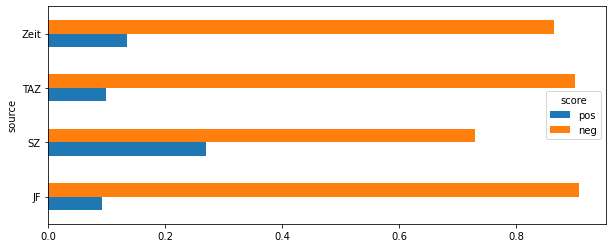

In [28]:
all_df.groupby('source').score.value_counts(normalize=True).unstack()[['pos', 'neg']].plot.barh(figsize=(10,4))
plt.show

In [29]:
all_df.groupby('source').score.value_counts(normalize=True)

source  score
JF      neg      0.907895
        pos      0.092105
SZ      neg      0.729231
        pos      0.270769
TAZ     neg      0.900000
        pos      0.100000
Zeit    neg      0.864912
        pos      0.135088
Name: score, dtype: float64

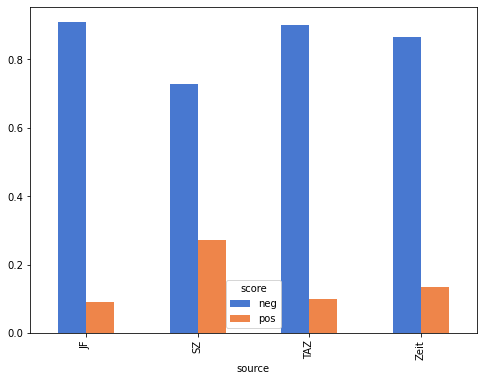

In [30]:
sns.set_palette('muted')

posneg_bysource = all_df.groupby('source').score.value_counts(normalize=True)
posneg_bysource

posneg_bysource.unstack(level=1).plot.bar(figsize=(8,6))
plt.show()

In [31]:
zeit_df_wsc = all_df[all_df['source'] == 'Zeit']
zeit_df_wsc

month_z = [date.split('-')[1] for date in zeit_df_wsc.date]
print(len(month_z))
zeit_df_wsc['month'] = month_z
zeit_df_wsc.tail()

573


/Users/emilymartin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,href,text,date,word_count,sent_count,toks,types,TTR,source,score,month
568,http://www.zeit.de/politik/deutschland/2015-01...,Am Mittwoch um 15.37 kommt Alexander Gauland g...,2015-01-08T16:00:49Z,893,45,1055,488,0.462559,Zeit,neg,01
569,http://www.zeit.de/2015/02/kreatives-berlin-to...,"Sie sagen, es sei Liebe. Als im Oktober 2014 d...",2015-01-08T09:01:28Z,705,50,825,462,0.560000,Zeit,pos,01
570,http://www.zeit.de/wirtschaft/2015-01/migratio...,"ZEIT ONLINE: Herr Brücker, zahlen die öffentli...",2015-01-06T13:36:03Z,668,44,767,374,0.487614,Zeit,neg,01
571,http://www.zeit.de/politik/deutschland/2015-01...,Wer ist Konrad Adam? Vor einigen Wochen hätte ...,2015-01-05T19:41:34Z,496,29,566,325,0.574205,Zeit,neg,01
572,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"Erst die Blue Sky M mit fast 800 Menschen, dan...",2015-01-02T18:23:42Z,581,33,662,350,0.528701,Zeit,neg,01


In [34]:
zeit_df_wsc['month'].value_counts()

09    81
10    79
11    69
12    68
08    51
05    44
01    40
02    32
04    32
06    28
07    28
03    21
Name: month, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

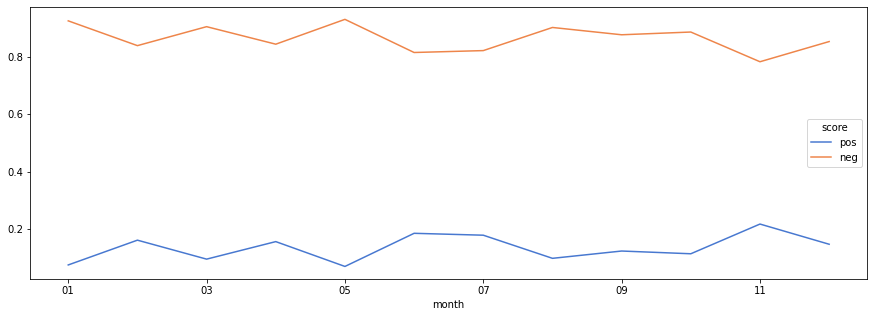

In [35]:
zeit_df_wsc.groupby('month').score.value_counts(normalize=True).unstack()[['pos', 'neg']].plot.line(figsize=(15,5))
plt.show